In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from wordcloud import WordCloud
trainData=pd.read_csv('train.csv')
testData = pd.read_csv("test.csv")
###############################################
testData.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [ ]:
trainData.shape

In [ ]:
testData.shape

In [ ]:
trainData.describe()

In [ ]:
testData.describe()

In [ ]:
trainData.isnull().sum()

In [ ]:
testData.isnull().sum()

In [ ]:
trainData.head()

In [2]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

## Dropping belongs_to_collection as most of it contains null

In [3]:
trainData.drop(['belongs_to_collection','id'], axis=1, inplace=True)
testData.drop(['belongs_to_collection','id'], axis=1, inplace=True)

##  plotting budget

(array([1.49e+03, 3.96e+02, 2.11e+02, 2.20e+02, 9.40e+01, 1.28e+02,
        7.30e+01, 7.30e+01, 4.00e+01, 4.90e+01, 3.30e+01, 3.80e+01,
        1.00e+01, 3.10e+01, 1.10e+01, 1.40e+01, 7.00e+00, 1.40e+01,
        3.00e+00, 1.70e+01, 1.00e+00, 7.00e+00, 3.00e+00, 7.00e+00,
        2.00e+00, 5.00e+00, 7.00e+00, 2.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.000e+00, 7.600e+06, 1.520e+07, 2.280e+07, 3.040e+07, 3.800e+07,
        4.560e+07, 5.320e+07, 6.080e+07, 6.840e+07, 7.600e+07, 8.360e+07,
        9.120e+07, 9.880e+07, 1.064e+08, 1.140e+08, 1.216e+08, 1.292e+08,
        1.368e+08, 1.444e+08, 1.520e+08, 1.596e+08, 1.672e+08, 1.748e+08,
        1.824e+08, 1.900e+08, 1.976e+08, 2.052e+08, 2.128e+08, 2.204e+08,
        2.280e+08, 2.356e+08, 2.432e+08, 2.508e+08, 2.58

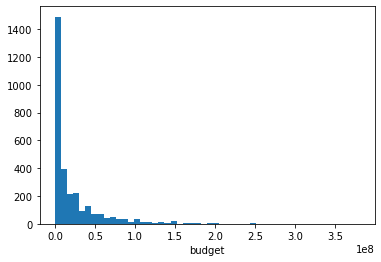

In [4]:
plt.xlabel( 'budget')
plt.hist(trainData['budget'],bins = 50)

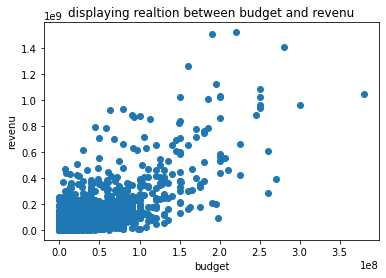

In [5]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['budget'], y=trainData['revenue'])

##  movies with low budget are many

In [ ]:
print( len(trainData[trainData['budget'] < 10000] ) )

In [6]:
trainData = trainData[trainData['budget'] >= 100000]
#trainData = trainData[(trainData.loc['budget'] >= 100000)]
#trainData = Data

In [7]:
MEAN = trainData['budget'].mean()

In [8]:
trainData['budget']= trainData['budget'].apply(lambda x : x+MEAN if x<100000  else x)

In [ ]:
#trainData['budget'] = trainData['budget'].replace(0, trainData['budget'].mean())

## using log transform without removing low budgets to have better distrbution

In [9]:
trainData['log_budget'] = np.log1p(trainData['budget'])
testData['log_budget'] = np.log1p(testData['budget'])

(array([ 16.,   7.,  15.,  34.,  25.,  47.,  55.,  89., 127., 152., 154.,
        239., 264., 268., 211., 201., 143.,  64.,  34.,   6.]),
 array([11.51293546, 11.92507278, 12.3372101 , 12.74934742, 13.16148473,
        13.57362205, 13.98575937, 14.39789669, 14.810034  , 15.22217132,
        15.63430864, 16.04644596, 16.45858327, 16.87072059, 17.28285791,
        17.69499523, 18.10713254, 18.51926986, 18.93140718, 19.3435445 ,
        19.75568181]),
 <BarContainer object of 20 artists>)

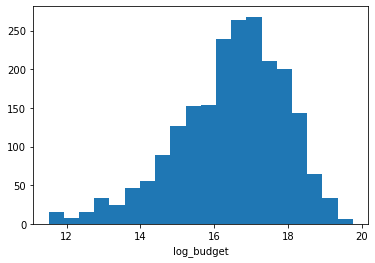

In [10]:
plt.xlabel( 'log_budget')
plt.hist(trainData['log_budget'],bins = 20)

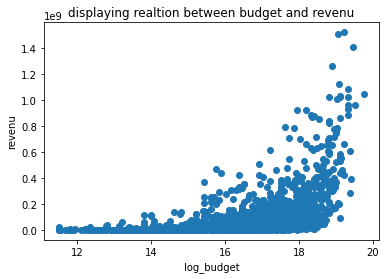

In [11]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'log_budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['log_budget'], y=trainData['revenue'])

# Experimenting with budget coulmn

## using log Transform after removing budgts less than 10k$

In [12]:
print( len(trainData[trainData['budget'] < 50000] ) )

0


In [13]:
print(len(trainData[trainData['budget'] < 10000]))

0


In [ ]:
trainData['budget'].describe()

In [ ]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['budget'], y=trainData['revenue'])

## old way

In [ ]:
print(len(trainData[trainData['budget'] == 0]))

In [15]:
gn = pd.DataFrame(columns=['genre_name'])
gn

,genre_name


In [16]:
trainData = pd.concat([trainData, gn], axis=1)
testData = pd.concat([testData, gn], axis=1)

trainData.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_name
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,NaN
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,NaN
2,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,NaN
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,NaN
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,NaN


In [ ]:
trainData.head()

## Note (generes can be one coulmn (length of geners ) or  using one hot encoder 

In [18]:
j = 0
trainData['genre_Count'] = 0
for i in trainData['genres']:
    d = get_dict(i)
    if d != {}:
        trainData['genre_name'][j] = d[0]['name'] 
        trainData['genre_Count'][j] = len(d)
    else:
         trainData['genre_name'][j] = np.NaN
    j += 1

j = 0
for i in testData['genres']:
    d = get_dict(i)
    if d != {}:
        testData['genre_name'][j] = d[0]['name'] 
        trainData['genre_Count'][j] = len(d)
    else:
         testData['genre_name'][j] = np.NaN
    j += 1
trainData.drop(['genres'], axis=1, inplace=True)
testData.drop(['genres'], axis=1, inplace=True)
trainData.head()


C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3094122960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][j] = d[0]['name']
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3094122960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3094122960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_name,genre_Count
0,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,Comedy,4
1,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,Comedy,2
2,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,Drama,2
3,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,Thriller,3
5,8000000,NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,...,Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,Horror,2


In [19]:

testData['homepage'].isnull().sum()

2978

In [20]:
trainData['homepage'].isnull().sum()

1387

In [23]:
Homepage=pd.DataFrame(columns=['Homepage'])
trainData=pd.concat([trainData,Homepage],axis=1)
testData=pd.concat([testData,Homepage],axis=1)

In [26]:
j = 0
for i in trainData['homepage']:
    if trainData['homepage'][j] == 'nan':
        trainData['Homepage'][j] = 0
    else:
        trainData['Homepage'][j] = 1
    j += 1

j = 0
for i in testData['homepage']:
    if  testData['homepage'][j] == 'nan':
         testData['Homepage'][j] = 0
    else:
         testData['Homepage'][j] = 1
    j += 1
trainData.head()

C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1342741806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Homepage'][j] = 1


KeyError: 4

In [29]:
trainData.drop(['homepage'], axis=1, inplace=True)
testData.drop(['homepage'], axis=1, inplace=True)
trainData["Homepage"].head()


KeyError: "['homepage'] not found in axis"

In [30]:

plt.catplot(x='Homepage',y='revenue',data=trainData)





AttributeError: module 'matplotlib.pyplot' has no attribute 'catplot'

In [ ]:
#imbd_id

In [31]:
trainData.drop(['imdb_id'], axis=1, inplace=True)
testData.drop(['imdb_id'], axis=1, inplace=True)


In [ ]:
#original_language	

In [32]:
for i,e in enumerate(trainData['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 en


C:\Users\mercy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='count'>

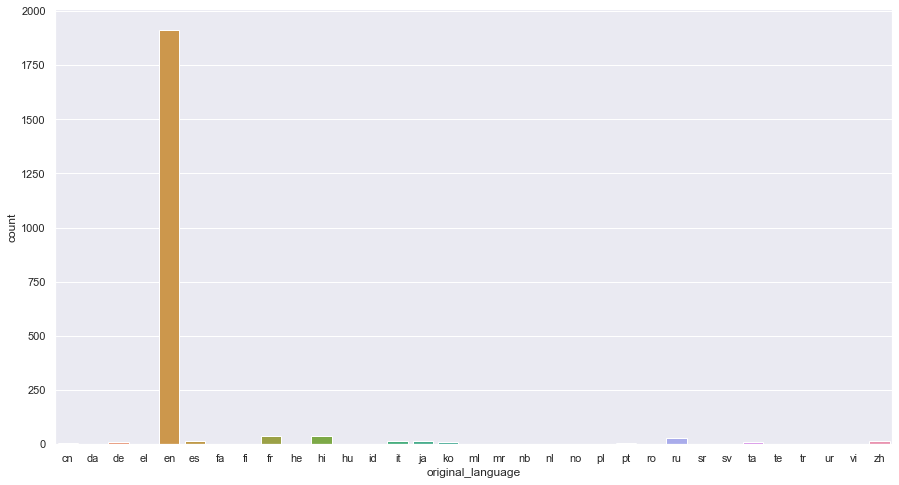

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(trainData['original_language'].sort_values())



In [34]:

for i in trainData['original_language']:
    if(i=='en'):
        trainData['Has_En']=1
    else:
        trainData['Has_En']=0
for i in testData['original_language']:
    if(i=='en'):
        testData['Has_En']=1
    else:
        testData['Has_En']=0

trainData.head()


,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_name,genre_Count,Has_En
0,14000000,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,Comedy,4,1
1,40000000,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,Comedy,2,1
2,3300000,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,Drama,2,1
3,1200000,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,Thriller,3,1
5,8000000,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,83.0,...,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,Horror,2,1


# original_title & overview

In [35]:
trainData.drop(['original_title','overview'], axis=1, inplace=True)
testData.drop(['original_title','overview'], axis=1, inplace=True)

# popularity	

In [36]:
trainData['popularity'].isnull().sum()

0

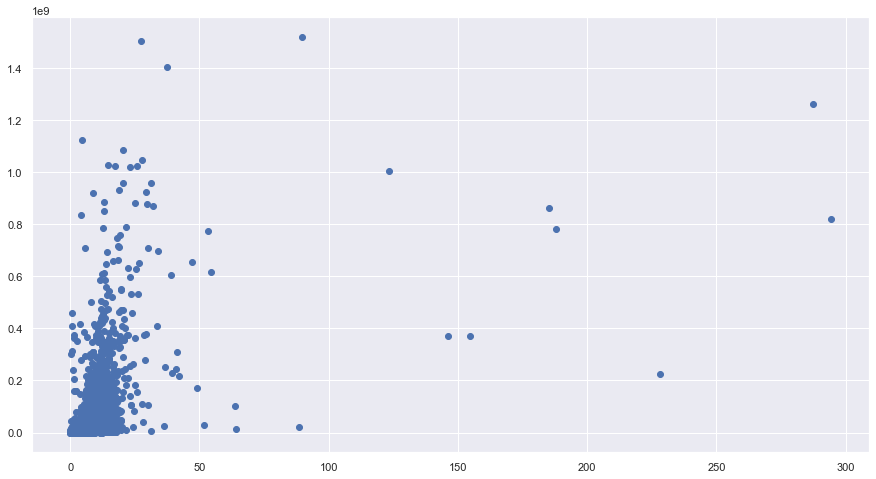

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.scatter('popularity','revenue',data=trainData)
plt.show()

# poster_path

In [38]:

trainData.drop(['poster_path','original_language'], axis=1, inplace=True)
testData.drop(['poster_path','original_language'], axis=1, inplace=True)


In [40]:
#production_companies
for i,e in enumerate(trainData["production_companies"][:5]):
    print(i,e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [41]:
num_production_companies=pd.DataFrame(columns=['num_production_companies'])
trainData=pd.concat([trainData,num_production_companies],axis=1)
testData=pd.concat([testData,num_production_companies],axis=1)


In [42]:
j=0
for i in trainData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        trainData['num_production_companies'][j]=len(d)
    else:
        trainData['num_production_companies'][j]=np.NaN
    j+=1
j=0
for i in testData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        testData['num_production_companies'][j]=len(d)
    else:
        testData['num_production_companies'][j]=np.NaN
    j+=1


C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/2612869256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=np.NaN
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/2612869256.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDa

In [43]:
trainData.drop(['production_companies'], axis=1, inplace=True)
testData.drop(['production_companies'], axis=1, inplace=True)

In [ ]:
trainData["num_production_companies"]

In [ ]:
name_compaines

In [ ]:

sns.countplot('production_companies',data=trainData)


In [44]:
trainData["num_production_companies"].isnull().sum()

668

In [45]:
trainData['num_production_companies'] = trainData['num_production_companies'].fillna(trainData['num_production_companies'].mode())

testData['num_production_companies'] = testData['num_production_companies'].fillna(testData['num_production_companies'].mode())


In [46]:
trainData["num_production_companies"].isnull().sum()
trainData['num_production_companies']=trainData['num_production_companies'].fillna(trainData['num_production_companies'].mean()).round()
testData['num_production_companies']=testData['num_production_companies'].fillna(testData['num_production_companies'].mean()).round()

In [ ]:
#production_countries

In [47]:
for i,e in enumerate(trainData["production_countries"][:5]):
    print(i,e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 nan


In [48]:
prodect_countries=pd.DataFrame(columns=["production_country"])
trainData=pd.concat([trainData,prodect_countries],axis=1)
testData=pd.concat([testData,prodect_countries],axis=1)


In [49]:
j = 0
for i in trainData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                trainData['production_country'][j] = 'United States of America'
        else:
            trainData['production_country'][j] = d[0]['name']
    else:
        trainData['production_country'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                testData['production_country'][j] = 'United States of America'
        else:
            testData['production_country'][j] = d[0]['name']
    else:
        testData['production_country'][j] = np.NaN
    j += 1

C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1265860272.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = np.NaN
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainD

In [ ]:
trainData.head()

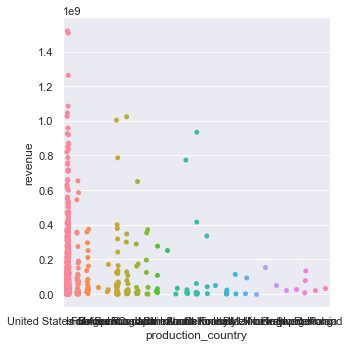

In [50]:
sns.catplot(x='production_country',y='revenue',data=trainData)

In [51]:
is_use_preduction=pd.DataFrame(columns=["is_use_preduction"])
trainData=pd.concat([trainData,is_use_preduction],axis=1)
testData=pd.concat([testData,is_use_preduction],axis=1)

In [52]:
j=0
for i in trainData["production_country"]:
    if i=='United States of America':
        trainData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        trainData['is_use_preduction'][j]=np.NaN
    else:
        trainData['is_use_preduction'][j]=0
    j+=1
j=0
for i in testData["production_country"]:
    if i=='United States of America':
        testData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        testData['is_use_preduction'][j]=np.NaN
    else:
        testData['is_use_preduction'][j]=0
    j+=1
    
    

C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/1949488897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['is_use_preduction'][

In [ ]:
trainData.head()


In [53]:
trainData.drop(['production_countries','production_country'], axis=1, inplace=True)
testData.drop(['production_countries','production_country'], axis=1, inplace=True)


In [54]:
trainData['is_use_preduction'].isnull().sum()

618

In [ ]:
trainData.head()


In [ ]:
#realse_data

In [55]:
testData.loc[testData['release_date'].isnull()==True, 'release_date']= '5/1/00'
testData[testData["release_date"]== '5/1/00']

,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget,genre_name,Homepage,Homepage,Has_En,num_production_companies,is_use_preduction
828,0,0.009057,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.00000,Drama,NaN,NaN,0,NaN,NaN
1731,103000000,23.186667,5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de...",18.45024,Action,NaN,NaN,0,NaN,NaN


In [56]:
trainData['release_date'] = pd.to_datetime(trainData['release_date'], format='%m/%d/%y')
testData['release_date'] = pd.to_datetime(testData['release_date'], format='%m/%d/%y')
trainData["release_year"] = pd.to_datetime(trainData["release_date"]).dt.year.astype(int)
trainData["release_day"] = pd.to_datetime(trainData["release_date"]).dt.dayofweek.astype(int)
trainData["release_month"] = pd.to_datetime(trainData["release_date"]).dt.month.astype(int)
testData["release_year"] = pd.to_datetime(testData["release_date"]).dt.year.astype(int)
testData["release_day"] = pd.to_datetime(testData["release_date"]).dt.dayofweek.astype(int)
testData["release_month"] = pd.to_datetime(testData["release_date"]).dt.month.astype(int)

In [57]:
# trainData['Day'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[0]
# trainData['Month'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[1]
# trainData['Year'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[2]
# trainData['Day'] = trainData['Day'].astype(int)
# trainData['Month'] = trainData['Month'].astype(int)
# trainData['Year'] = trainData['Year'].astype(int)
# testData['Day'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[0]
# testData['Month'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[1]
# testData['Year'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[2]
# testData['Day'] = trainData['Day'].astype(int)
# testData['Month'] = trainData['Month'].astype(int)
# testData['Year'] = trainData['Year'].astype(int)

In [58]:
# Since this competition was in 2019, there shouldn't be a release that after 2019
trainData['release_year'].max()

2068

In [59]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

trainData['release_year'] = trainData['release_year'].apply(lambda x: fix_date(x))
testData['release_year'] = testData['release_year'].apply(lambda x: fix_date(x))

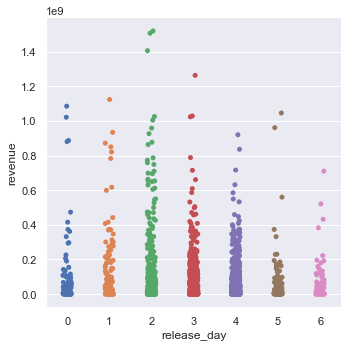

In [60]:
sns.catplot(x='release_day',y='revenue',data=trainData)


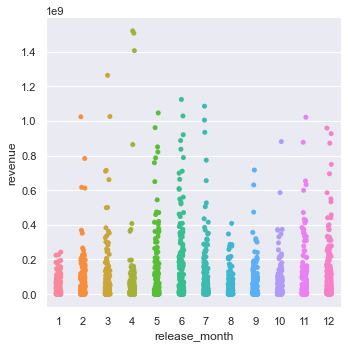

In [61]:
sns.catplot(x='release_month',y='revenue',data=trainData)


(array([  6.,  16.,  15.,  29.,  44.,  60., 189., 306., 660., 826.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <BarContainer object of 10 artists>)

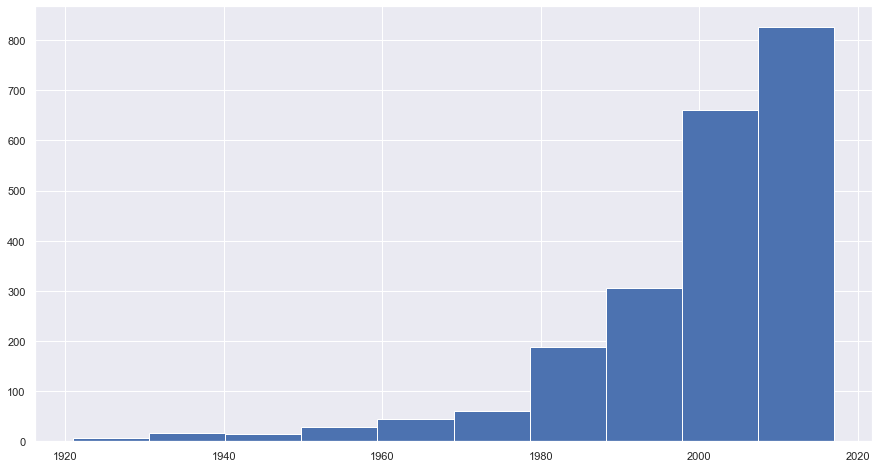

In [62]:
plt.hist('release_year',data=trainData)

In [ ]:
#runtime 

In [63]:
for i,e in enumerate(trainData['runtime'][:5]):
    print(i,e)

0 93.0
1 113.0
2 105.0
3 122.0
4 83.0


In [64]:
trainData['runtime'].isnull().sum()

1

In [65]:
trainData['runtime']=trainData['runtime'].fillna(trainData['runtime'].mean()).round()
testData['runtime']=testData['runtime'].fillna(testData['runtime'].mean()).round()
trainData['runtime'].isnull().sum()

0

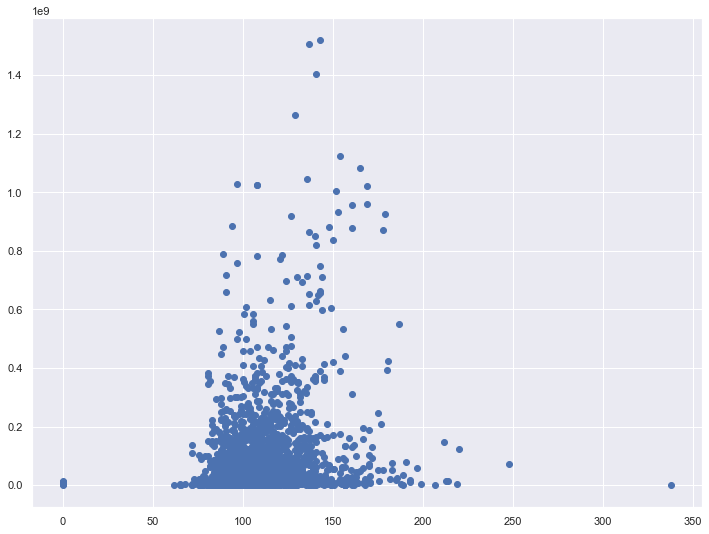

In [66]:
plt.subplots(figsize=(12, 9))
plt.scatter('runtime','revenue',data=trainData)

In [ ]:
#spoken_languages

In [67]:
for i,e in enumerate(trainData['spoken_languages'][:5]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'en', 'name': 'English'}]


In [68]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
trainData = pd.concat([trainData, number_of_spoken_languages], axis=1)
testData = pd.concat([testData, number_of_spoken_languages], axis=1)

In [69]:
j = 0
for i in trainData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        trainData['number_of_spoken_languages'][j] = len(d)
    else:
        trainData['number_of_spoken_languages'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        testData['number_of_spoken_languages'][j] = len(d)
    else:
        testData['number_of_spoken_languages'][j] = np.NaN
    j += 1

C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3689744017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = np.NaN
C:\Users\mercy\AppData\Local\Temp/ipykernel_6836/3689744017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


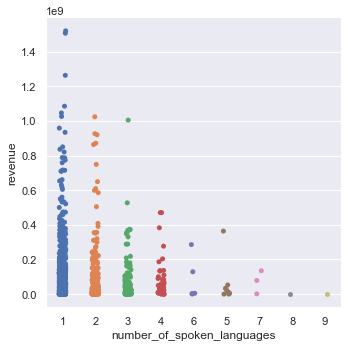

In [70]:
sns.catplot(x='number_of_spoken_languages', y='revenue', data=trainData)

In [71]:
trainData["number_of_spoken_languages"].isnull().sum()

621

In [ ]:
trainData['number_of_spoken_languages']=trainData['number_of_spoken_languages'].fillna(trainData['number_of_spoken_languages'].mean()).round()
testData['number_of_spoken_languages']=testData['number_of_spoken_languages'].fillna(testData['number_of_spoken_languages'].mean()).round()

In [ ]:
trainData.drop(['spoken_languages'], axis=1, inplace=True)
testData.drop(['spoken_languages'], axis=1, inplace=True)

In [ ]:
trainData.head()

## LAST six features (Ahmed section)

In [ ]:
###status
trainData['status'].value_counts()

testData['status'].value_counts()

In [ ]:
Status=pd.DataFrame(columns=["Status"])
trainData=pd.concat([trainData,Status],axis=1)
testData=pd.concat([testData,Status],axis=1)

In [ ]:
j=0
for i in trainData["status"]:
    if i=='Released':
        trainData['Status'][j]=1
    elif str(i)=='NaN':
        trainData['Status'][j]=np.NaN
    else:
        trainData['Status'][j]=0
    j+=1
j=0
for i in testData["status"]:
    if i=='Released':
        testData['Status'][j]=1
    elif str(i)=='NaN':
        testData['Status'][j]=np.NaN
    else:
        testData['Status'][j]=0
    j+=1
    

### This feature is not useful most of them are already released 

In [ ]:
trainData.drop(['status'], axis=1, inplace=True)
testData.drop(['status'], axis=1, inplace=True)


In [ ]:
sns.catplot(x="Status",y="revenue",data=trainData)

In [ ]:
trainData.drop(['Status'], axis=1, inplace=True)
testData.drop(['Status'], axis=1, inplace=True)

trainData.head()

## tagline

In [ ]:
plt.figure(figsize = (12, 12))
text = ' '.join(trainData['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

##  from this figure it's shown most films contains comedy  , drama related words.

## title will be dropped not important

In [ ]:
trainData.drop(['title','release_date','tagline','Keywords'], axis=1, inplace=True)
testData.drop(['title','release_date','tagline','Keywords'], axis=1, inplace=True)

## keywords

## I will leave keywords for now 

## cast

## temp code below don't care now 

In [ ]:
size_of_cast = pd.DataFrame(columns=['size_of_cast'])
trainData = pd.concat([trainData, size_of_cast], axis=1)
testData = pd.concat([testData, size_of_cast], axis=1)

In [ ]:
j = 0
for i in trainData['cast']:
    d = get_dict(i)
    if d != {}:
        trainData['size_of_cast'][j] = len(d)
    else:
        trainData['size_of_cast'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['cast']:
    d = get_dict(i)
    if d != {}:
        testData['size_of_cast'][j] = len(d)
    else:
        testData['size_of_cast'][j] = np.NaN
    j += 1

In [ ]:
trainData.drop(['cast'], axis=1, inplace=True)
testData.drop(['cast'], axis=1, inplace=True)

In [ ]:
trainData["size_of_cast"].isnull().sum()

In [ ]:
trainData['size_of_cast']=trainData['size_of_cast'].fillna(trainData['size_of_cast'].mean()).round()
testData['size_of_cast']=testData['size_of_cast'].fillna(testData['size_of_cast'].mean()).round()

In [ ]:
plt.scatter("size_of_cast","revenue",data=trainData)

In [ ]:
#crew

In [ ]:
trainData.drop(['crew'], axis=1, inplace=True)
testData.drop(['crew'], axis=1, inplace=True)

In [ ]:

trainData.head()



In [ ]:

from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(trainData,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(trainData[c].values))
        trainData[c] = lbl.transform(list(trainData[c].values))
    return trainData
cols={'genre_name'}
trainData=Feature_Encoder(trainData,cols)
def Feature_Encoder(testData,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(testData[c].values))
        testData[c] = lbl.transform(list(testData[c].values))
    return testData
cols={'genre_name'}
testData=Feature_Encoder(testData,cols)

In [ ]:
trainData.head()

In [ ]:
corr =trainData.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = trainData[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [ ]:
testData.head()

In [ ]:
#X=trainData.copy()
X=trainData[['budget','popularity','runtime','size_of_cast']]
#X.drop(['revenue'], axis=1, inplace=True)


 


In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Features
Y=trainData['revenue'] #Label

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20,shuffle=False)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)


poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)
ypred=poly_model.predict(poly_features.transform(X_test))

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
print('r2 score ', r2_score( y_test ,prediction))